# LSN Esercitazione 11

## Esercizio 11.1

Lo scopo di questo esercizio è entrare in confidenza con il fatto che, variare i parametri di una rete neurale (come il numero di epoche durante le quali la addestriamo) o il numero di dati su cui la trainiamo, ha una gigantesca importanza sull'efficacia del "fit" effettuato con la rete neurale. 

Infatti se utilizziamo semplicemente i valori forniti di default in questa esercitazione, noteremo che la rete neurale performerà in modo poco appropriato sui dati e non otterremo il risultato desiderato.

In [1]:
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import numpy as np
from IPython.display import clear_output

import tensorflow as tf
from tensorflow import keras

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras import backend as K
from tensorflow.keras.utils import get_custom_objects

plt.rc('axes', labelsize=14)     # fontsize of the x and y labels
plt.rc('xtick', labelsize=14)    # fontsize of the tick labels
plt.rc('ytick', labelsize=14)    # fontsize of the tick labels
plt.rc('legend', fontsize=14)    # fontsize of the legend

In [2]:
# target parameters of f(x) = m*x + b
m = 2 # slope
b = 1 # intersect

# generate training inputs
np.random.seed(0)
x_train = np.random.uniform(-1, 1, 100)
x_valid = np.random.uniform(-1, 1, 10)
x_valid.sort()
y_target = m * x_valid + b # ideal (target) linear function

sigma = 0.0 # noise standard deviation, for the moment it is absent
y_train = np.random.normal(m * x_train + b, sigma) # actual measures from which we want to guess regression parameters
y_valid = np.random.normal(m * x_valid + b, sigma)

In [3]:
# compose the NN model
model = tf.keras.Sequential()
model.add(Dense(1, input_shape=(1,)))

# compile the model choosing optimizer, loss and metrics objects
model.compile(optimizer='sgd', loss='mse', metrics=['mse'])

# save the weights that we will use later
model.save_weights('model.h5')

In [4]:
# fit the model using training dataset
# over 30 epochs of 32 batch size each
# report training progress against validation data
history = model.fit(x=x_train, y=y_train, 
          batch_size=32, epochs=30,
          shuffle=True, # a good idea is to shuffle input before at each epoch
          validation_data=(x_valid, y_valid),
          verbose = 0 # I don't want a huge print
          )

print('Done!')

Done!


Utilizzando 100 dati di training e 10 di validazione (o test) (con rumore nullo, $\sigma=0$) e addestrando la nostra rete neurale per 30 epoche, fittiamo (a partire da una funzione di target $f(x) = 2x +1$) la funzione che viene stampata nella cella seguente. Successivamente mostriamo un plot della loss che otteniamo sui dati di training e di test e uno delle rette target e fittata.



------------------------------------------------------------------
La funzione ottenuta tramite l'addestramento della rete neurale è: 
f(x) = 0.99 * x + 0.85
------------------------------------------------------------------




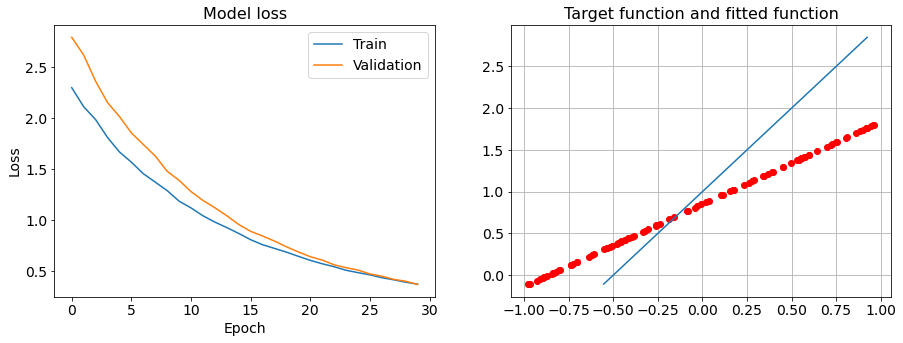

In [5]:
param = model.get_weights()

print('\n\n------------------------------------------------------------------')
print("La funzione ottenuta tramite l'addestramento della rete neurale è: ")
print('f(x) = {:03.2f} * x + {:03.2f}'.format(float(param[0]), float(param[1])))
print('------------------------------------------------------------------\n\n')

# look into training history
# Plot training & validation loss values
plt. subplots(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss', fontsize=16)
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='best')

# Plot target and fit
plt.subplot(1,2,2)
plt.title('Target function and fitted function', fontsize=16)
x_predicted = np.random.uniform(-1, 1, 100)
y_predicted = model.predict(x_predicted)
# Fitted function
plt.plot(x_predicted, y_predicted,'ro')
# Target function
plt.plot(x_valid, y_target)
plt.grid(True)
plt.show()

In [6]:
print('Loss and accuracy after training:')
# evaluate model
score = model.evaluate(x_valid, y_valid, batch_size=32, verbose=1)

# print performance
print()
print('Test loss:', score[0])

# evaluate model with the exact curve
print('\n\n------------------------------------------------------------------')
print('Confronto con i valori target:')
score = model.evaluate(x_valid, y_target, batch_size=32, verbose=1)

# print performance
print()
print('Test loss:', score[0])

Loss and accuracy after training:
1/1 [==============================] - 0s 1ms/step - loss: 0.3663 - mse: 0.3663

Test loss: 0.36631259322166443


------------------------------------------------------------------
Confronto con i valori target:
1/1 [==============================] - 0s 1ms/step - loss: 0.3663 - mse: 0.3663

Test loss: 0.36631259322166443


Come abbiamo anticipato, questa funzione è chiaramente non soddisfacente! Infatti la loss rimane molto alta, anche dopo 30 epoche e la retta non viene fittata. Ci chiediamo quindi quale possa essere il parametro che ci consente di ottenere una loss più bassa (rimanendo sempre, per ora, con rumore nullo).

Come primo tentativo **aumentiamo quindi il numero di epoche** a 100. Quello che ci si aspetta è che, dando più tempo alla rete per imparare i dati, la loss raggiungerà dei valori più bassi e otterremo un buon fit della retta desiderata.

In [7]:
# We load the same weights as the beginning
# (in other words, we reset the network)
model.load_weights('model.h5')

In [8]:
# fit the model using training dataset
# over 100 epochs of 32 batch size each
# report training progress against validation data
history = model.fit(x=x_train, y=y_train, 
          batch_size=32, epochs=100,
          shuffle=True, # a good idea is to shuffle input before at each epoch
          validation_data=(x_valid, y_valid),
          verbose = 0 # I don't want a huge print
          )
print('Done!')

Done!




------------------------------------------------------------------
La funzione ottenuta tramite l'addestramento della rete neurale è: 
f(x) = 1.84 * x + 0.99
------------------------------------------------------------------




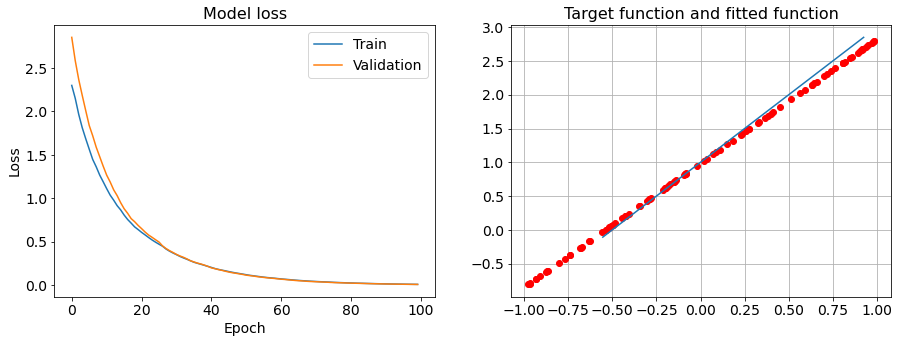

In [9]:
param = model.get_weights()

print('\n\n------------------------------------------------------------------')
print("La funzione ottenuta tramite l'addestramento della rete neurale è: ")
print('f(x) = {:03.2f} * x + {:03.2f}'.format(float(param[0]), float(param[1])))
print('------------------------------------------------------------------\n\n')

# look into training history
# Plot training & validation loss values
plt. subplots(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss', fontsize=16)
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='best')

# Plot target and fit
plt.subplot(1,2,2)
plt.title('Target function and fitted function', fontsize=16)
x_predicted = np.random.uniform(-1, 1, 100)
y_predicted = model.predict(x_predicted)
# Fitted function
plt.plot(x_predicted, y_predicted,'ro')
# Target function
plt.plot(x_valid, y_target)
plt.grid(True)
plt.show()

Nella cella successiva mostriamo che la loss e l'accuratezza ottenute alla ultima epoca sono molto più basse rispetto al caso precedente (sia per i dati di validazione, sia quando li confrontiamo con il target desiderato).

In [10]:
print('Loss and accuracy after training:')
# evaluate model
score = model.evaluate(x_valid, y_valid, batch_size=32, verbose=1)

# print performance
print()
print('Test loss:', score[0])

# evaluate model with the exact curve
print('\n\n------------------------------------------------------------------')
print('Confronto con i valori target:')
score = model.evaluate(x_valid, y_target, batch_size=32, verbose=1)

# print performance
print()
print('Test loss:', score[0])

Loss and accuracy after training:
1/1 [==============================] - 0s 989us/step - loss: 0.0084 - mse: 0.0084

Test loss: 0.008376647718250751


------------------------------------------------------------------
Confronto con i valori target:
1/1 [==============================] - 0s 1ms/step - loss: 0.0084 - mse: 0.0084

Test loss: 0.008376647718250751


Vediamo ora cosa succede se **aumentiamo il numero di dati di training** della nostra rete (passando da 100 a 1000). Anche in questo caso ci aspettiamo che il fit verrà più preciso; infatti, stiamo dando alla nostra rete più dati su cui addestrarsi e questo significa che i suoi pesi e bias verranno calibrati più precisamente.

**N.B.**: riportiamo il numero delle epoche a 30.

In [11]:
# We load the same weights as the beginning
# (in other words, we reset the network)
model.load_weights('model.h5')

In [12]:
# generate training inputs
np.random.seed(0)
x_train = np.random.uniform(-1, 1, 1000) # <--- We changed this number!
x_valid = np.random.uniform(-1, 1, 100)
x_valid.sort()
y_target = m * x_valid + b # ideal (target) linear function

sigma = 0.0 # noise standard deviation, for the moment it is absent
y_train = np.random.normal(m * x_train + b, sigma) # actual measures from which we want to guess regression parameters
y_valid = np.random.normal(m * x_valid + b, sigma)

In [13]:
# fit the model using training dataset
# over 30 epochs of 32 batch size each
# report training progress against validation data
history = model.fit(x=x_train, y=y_train, 
          batch_size=32, epochs=30,
          shuffle=True, # a good idea is to shuffle input before at each epoch
          validation_data=(x_valid, y_valid),
          verbose = 0 # I don't want a huge print
          )
print('Done!')

Done!




------------------------------------------------------------------
La funzione ottenuta tramite l'addestramento della rete neurale è: 
f(x) = 2.00 * x + 1.00
------------------------------------------------------------------




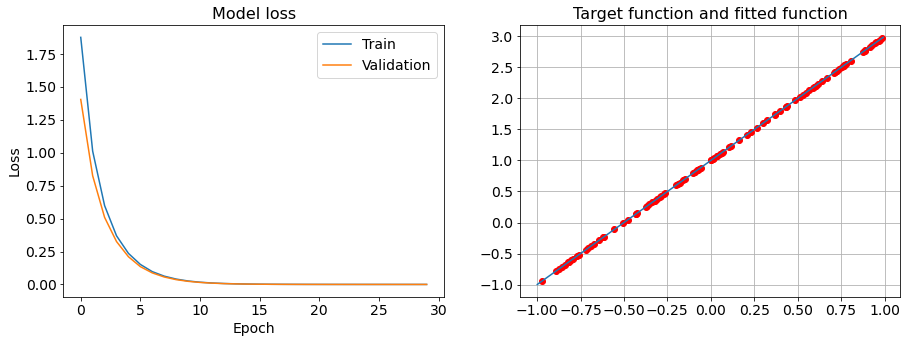



------------------------------------------------------------------
Loss and accuracy after training:
4/4 [==============================] - 0s 2ms/step - loss: 4.0323e-06 - mse: 4.0323e-06

Test loss: 4.032335709780455e-06


------------------------------------------------------------------
Confronto con i valori target:
4/4 [==============================] - 0s 2ms/step - loss: 4.0323e-06 - mse: 4.0323e-06

Test loss: 4.032335709780455e-06


In [14]:
def plot_summary():
    # look into training history
    # Plot training & validation loss values
    plt. subplots(figsize=(15,5))
    plt.subplot(1,2,1)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model loss', fontsize=16)
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='best')

    # Plot target and fit
    plt.subplot(1,2,2)
    plt.title('Target function and fitted function', fontsize=16)
    x_predicted = np.random.uniform(-1, 1, 100)
    y_predicted = model.predict(x_predicted)
    # Fitted function
    plt.plot(x_predicted, y_predicted,'ro')
    # Target function
    plt.plot(x_valid, y_target)
    plt.grid(True)
    plt.show()


    print('\n\n------------------------------------------------------------------')
    print('Loss and accuracy after training:')
    # evaluate model
    score = model.evaluate(x_valid, y_valid, batch_size=32, verbose=1)

    # print performance
    print()
    print('Test loss:', score[0])

    # evaluate model with the exact curve
    print('\n\n------------------------------------------------------------------')
    print('Confronto con i valori target:')
    score = model.evaluate(x_valid, y_target, batch_size=32, verbose=1)

    # print performance
    print()
    print('Test loss:', score[0])

param = model.get_weights()
print('\n\n------------------------------------------------------------------')
print("La funzione ottenuta tramite l'addestramento della rete neurale è: ")
print('f(x) = {:03.2f} * x + {:03.2f}'.format(float(param[0]), float(param[1])))
print('------------------------------------------------------------------\n\n')

plot_summary()

Osserviamo che aumentare il numero di dati ci fornisce una loss molto più piccola (e quindi prestazioni molto migliori) rispetto ad aumentare le epoche. Questo ha senso, infatti stiamo fornendo alla rete più dati su cui addestrarsi e correremo di meno il rischio di incorrere nell'overfitting.

Siamo ora pronti a studiare gli **effetti del rumore**, ovvero ciò che succede quando $\sigma\neq0$. Utilizziamo quindi 1000 dati di training (e 100 di test), lasciando il numero di epoche invariato (a 30). 

In particolare studiamo il caso $\sigma=0.5$.

In [15]:
# We load the same weights as the beginning
# (in other words, we reset the network)
model.load_weights('model.h5')

In [16]:
# generate training inputs
np.random.seed(0)
x_train = np.random.uniform(-1, 1, 1000) 
x_valid = np.random.uniform(-1, 1, 100)
x_valid.sort()
y_target = m * x_valid + b # ideal (target) linear function

sigma = 0.5 # noise standard deviation             # <--- We changed this number!
y_train = np.random.normal(m * x_train + b, sigma) # actual measures from which we want to guess regression parameters
y_valid = np.random.normal(m * x_valid + b, sigma)

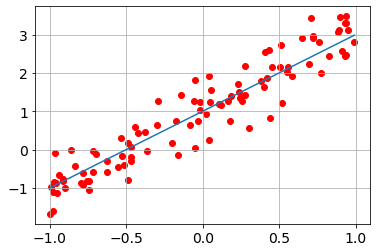

In [17]:
# plot validation and target dataset
plt.plot(x_valid, y_target)
plt.scatter(x_valid, y_valid, color='r')
plt.grid(True)
plt.show()

In [18]:
# fit the model using training dataset
# over 30 epochs of 32 batch size each
# report training progress against validation data
history = model.fit(x=x_train, y=y_train, 
          batch_size=32, epochs=30,
          shuffle=True, # a good idea is to shuffle input before at each epoch
          validation_data=(x_valid, y_valid),
          verbose = 0 # I don't want a huge print
          )
print('Done!')

Done!




------------------------------------------------------------------
La funzione ottenuta tramite l'addestramento della rete neurale è: 
f(x) = 2.00 * x + 1.01
------------------------------------------------------------------




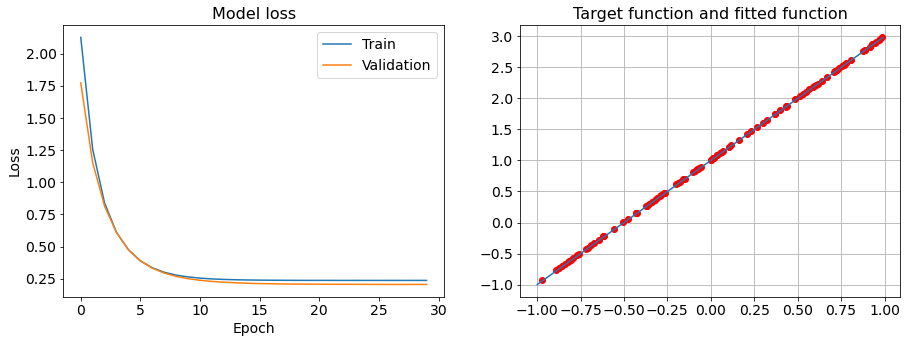



------------------------------------------------------------------
Loss and accuracy after training:
4/4 [==============================] - 0s 2ms/step - loss: 0.2057 - mse: 0.2057

Test loss: 0.2056933343410492


------------------------------------------------------------------
Confronto con i valori target:
4/4 [==============================] - 0s 2ms/step - loss: 1.1367e-04 - mse: 1.1367e-04

Test loss: 0.00011366704711690545


In [19]:
param = model.get_weights()
print('\n\n------------------------------------------------------------------')
print("La funzione ottenuta tramite l'addestramento della rete neurale è: ")
print('f(x) = {:03.2f} * x + {:03.2f}'.format(float(param[0]), float(param[1])))
print('------------------------------------------------------------------\n\n')

plot_summary()

In questo caso notiamo che il confronto con la funzione target ci dà una loss molto bassa, mentre la loss per il validation set rimane a $0.2$. Questo è perfettamente normale e significa che la NN sta riproducendo la retta desiderata con precisione, ma che non riproduce il rumore dei dati. Se la rete neurale riproducesse il rumore dei dati allora avremmo una loss molto bassa anche per il validation set e avremmo overfitting.

## Esercizio 11.2

Il **teorema di approssimazione universale** ci assicura che utilizzando un singolo hidden layer (arbitrariamente grande), con funzioni di attivazione *s-shaped* (come per esempio la tangente iperbolica), la nostra rete neurale può approssimare ogni funzione continua su un insieme compatto. Questo è esattamente il nostro caso, poiché stiamo cercando di approssimare

$$f(x)=4-3x-2x^2+3x^3, x\in [-1,1]$$

Quindi ciò che dobbiamo trovare è il numero di neuroni ideale per il suddetto hidden layer. Nelle celle seguenti, dopo aver generato i dati necessari (ne abbiamo generati 10000 in modo da avere un numero di dati sufficiente per imparare la funzione $f(x)$), creiamo quindi la NN e andiamo a considerare diversi valori di $n_\text{hid}$, numero di neuroni dell'hidden layer.

In [20]:
# parameters of f(x)=4-3*x-2*x^2+3*x^3
a = 4
b = -3
c = -2
d = 3

# generate training inputs
np.random.seed(0)
x_train = np.random.uniform(-1, 1, 10000)
x_valid = np.random.uniform(-1, 1, 100)
x_valid.sort()
y_target = a + b * x_valid + c * x_valid**2 + d * x_valid**3 # ideal (target) linear function

sigma = 0.0 # noise standard deviation, for the moment it is absent
y_train = np.random.normal(a + b * x_train + c * x_train**2 + d * x_train**3, sigma) # actual measures from which we want to guess regression parameters
y_valid = np.random.normal(a + b * x_valid + c * x_valid**2 + d * x_valid**3, sigma)

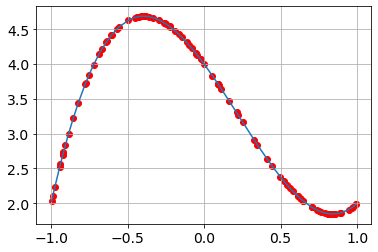

In [21]:
# plot validation and target dataset
plt.plot(x_valid, y_target)
plt.scatter(x_valid, y_valid, color='r')
plt.grid(True)
plt.show()

In [22]:
n_hid = [5, 10, 25, 50, 100]
Loss = []

for n in n_hid:
    clear_output(wait=True)
    print('For n_hid =',n, ':')
    # compose the NN model
    model = keras.Sequential([
      keras.layers.Dense(units=n, input_shape=(1,), activation='tanh'),
      keras.layers.Dense(units=1, activation='linear'),
    ])

    # compile the model choosing optimizer, loss and metrics objects
    model.compile(optimizer='adam', loss='mse', metrics=['mse'])

    # fit the model using training dataset
    # over 30 epochs of 32 batch size each
    # report training progress against validation data
    history = model.fit(x=x_train, y=y_train, 
          batch_size=32, epochs=30,
          shuffle=True, # a good idea is to shuffle input before at each epoch
          validation_data=(x_valid, y_valid),
          verbose = 0 # I don't want a huge print
          )
    print('Done!')

    Loss.append(history.history['loss'][-1])

For n_hid = 100 :
Done!


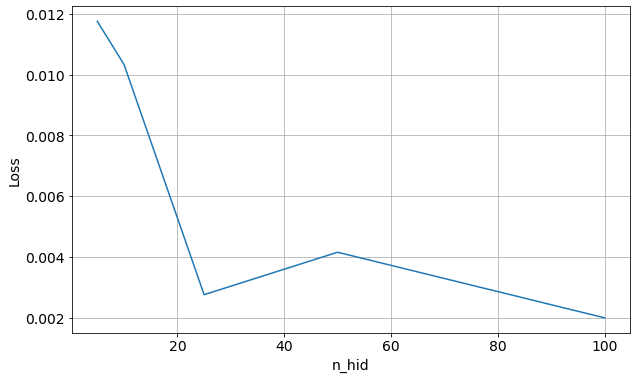

In [23]:
plt.subplots(figsize=(10,6))
plt.plot(n_hid, Loss)
plt.xlabel('n_hid')
plt.ylabel('Loss')
plt.grid(True)
plt.show()

Grazie a questo grafico (molto qualitativo!) osserviamo che in media la loss decresce al crescere del numero di neuroni dell'hidden layer e scegliamo come valore $n_\text{hid} = 25$, che sembra essere un buon compromesso tra prestazioni, velocità di addestramento e complessità della rete neurale. Mostriamo ora per questo valore i grafici più approfonditi della loss e del fit e osserviamo che la funzione desiderata è stata approssimata in modo preciso dalla rete neurale da noi scelta.

In [24]:
# compose the NN model
model = keras.Sequential([
    keras.layers.Dense(units=25, input_shape=(1,), activation='tanh'),
    keras.layers.Dense(units=1, activation='linear'),
])

# compile the model choosing optimizer, loss and metrics objects
model.compile(optimizer='adam', loss='mse', metrics=['mse'])

In [25]:
# fit the model using training dataset
# over 30 epochs of 32 batch size each
# report training progress against validation data
history = model.fit(x=x_train, y=y_train, 
          batch_size=32, epochs=30,
          shuffle=True, # a good idea is to shuffle input before at each epoch
          validation_data=(x_valid, y_valid),
          verbose = 0 # I don't want a huge print
          )

print('Done!')

Done!


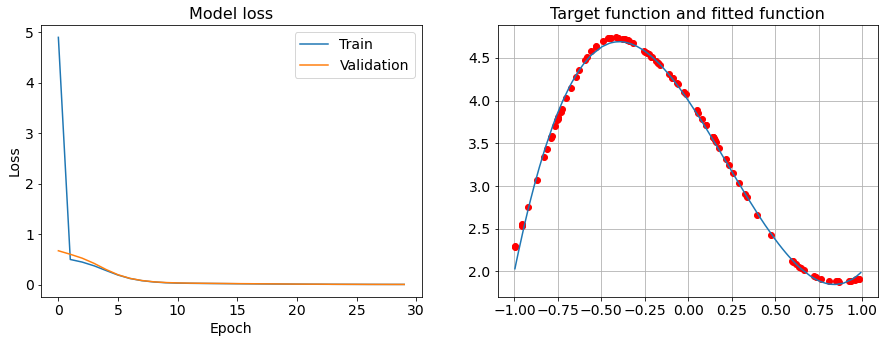



------------------------------------------------------------------
Loss and accuracy after training:
4/4 [==============================] - 0s 2ms/step - loss: 0.0027 - mse: 0.0027

Test loss: 0.0027347200084477663


------------------------------------------------------------------
Confronto con i valori target:
4/4 [==============================] - 0s 2ms/step - loss: 0.0027 - mse: 0.0027

Test loss: 0.0027347200084477663


In [26]:
plot_summary()

Abbiamo osservato che cambiando l'optimizer da SGD ad Adam, le prestazioni migliorano. Nel grafico presentato qui sotto notiamo come le prestazioni della rete fuori dal range su cui l'abbiamo addestrata (ovvero, per esempio, in $[-2,-1] \cup [+1,+2]$) non siano buone.

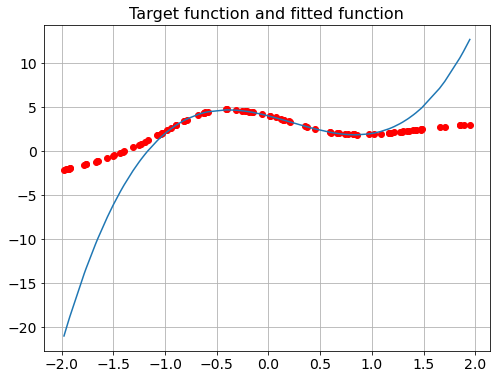

In [27]:
# Plot target and fit
plt.figure(figsize=(8,6))
plt.title('Target function and fitted function', fontsize=16)
x_predicted = np.random.uniform(-2, 2, 100)
y_predicted = model.predict(x_predicted)
# Fitted function
plt.plot(x_predicted, y_predicted,'ro')
# Target function
x_predicted.sort()
y_target = a + b * x_predicted + c * x_predicted**2 + d * x_predicted**3 # ideal (target) linear function
plt.plot(x_predicted, y_target)
plt.grid(True)
plt.show()

## Esercizio 11.3

Ci poniamo ora come obiettivo quello di fittare con una NN la funzione trigonometrica $f(x,y) = \sin(x^2+y^2)$ con $x\in[-1.5, 1.5]$ e $y\in[-1.5, 1.5]$. A questo scopo abbiamo utilizzato il teorema di approssimazione universale per reti neurali di larghezza fissata. Secondo questo teorema ogni funzione che abbia uno spazio di input $n$-dimensionale (nel nostro caso $n=2$) può essere approssimata da una rete neurale i cui layer sono composti da $n+4$ ($=6$ nel nostro caso) neuroni e con ReLU come funzione di attivazione. L'arbitrarietà questa volta sta nel numero di layer che consideriamo (ovvero nella profondità della nostra rete).

Utilizzando 3 di questi layer e avendo come output un layer composto da 1 neurone con attivazione lineare siamo riusciti ad approssimare la funzione in modo soddisfacente, come dimostrano i grafici della loss e del fit.

In [28]:
# generate training inputs
np.random.seed(0)
x_train = np.zeros((10000, 2))
x_train[:,0] = np.random.uniform(-1.5, 1.5, 10000)
x_train[:,1] = np.random.uniform(-1.5, 1.5, 10000)

x_valid = np.zeros((1000,2))
x_valid[:,0] = np.random.uniform(-1.5, 1.5, 1000)
x_valid[:,1] = np.random.uniform(-1.5, 1.5, 1000)

z_target = np.sin(x_valid[:,0]**2 + x_valid[:,1]**2) # ideal (target) function

sigma = 0.0 # noise standard deviation, for the moment it is absent
z_train = np.random.normal(np.sin(x_train[:,0]**2 + x_train[:,1]**2), sigma) # actual measures from which we want to guess regression parameters
z_valid = np.random.normal(np.sin(x_valid[:,0]**2 + x_valid[:,1]**2), sigma)

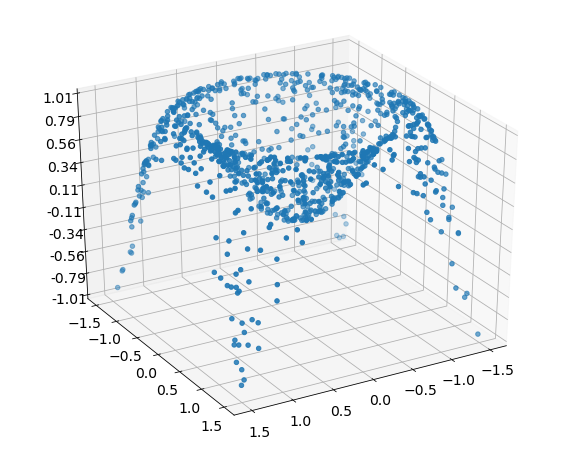

In [29]:
fig = plt.figure(figsize=(10,8))
ax = fig.gca(projection='3d')

# Plot the surface.
surf = ax.scatter(x_valid[:,0], x_valid[:,1], z_target)

# Customize the z axis.
ax.set_zlim(-1.01, 1.01)
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))
ax.view_init(elev=30., azim=60)

plt.show()

In [30]:
# compose the NN model
model = keras.Sequential([
    keras.layers.Dense(units=6, input_shape=(2,), activation='relu'),
    keras.layers.Dense(units=6, activation='relu'),
    keras.layers.Dense(units=6, activation='relu'),
    keras.layers.Dense(units=1, activation='linear')
])

# compile the model choosing optimizer, loss and metrics objects
model.compile(optimizer='sgd', loss='mse', metrics=['mse'])

In [31]:
# fit the model using training dataset
# over 100 epochs of 32 batch size each
# report training progress against validation data
history = model.fit(x=x_train, y=z_train, 
          batch_size=32, epochs=100,
          shuffle=True, # a good idea is to shuffle input before at each epoch
          validation_data=(x_valid, z_valid),
          verbose = 0 # I don't want a huge print
          )

print('Done!')

Done!


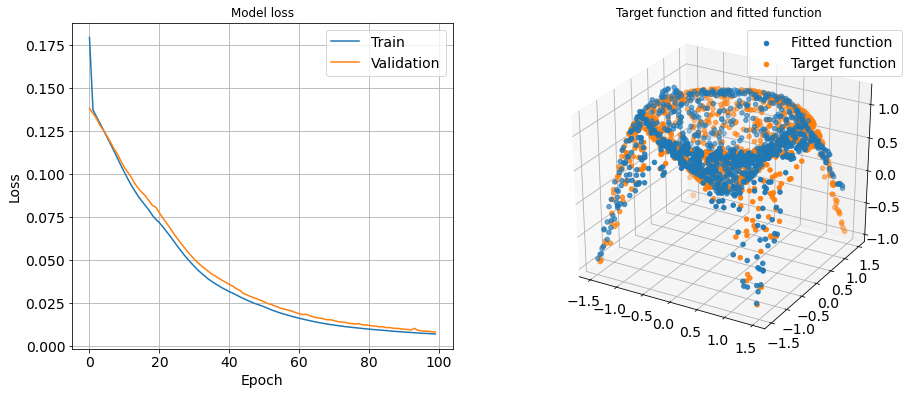



------------------------------------------------------------------
Loss and accuracy after training:
32/32 [==============================] - 0s 1ms/step - loss: 0.0079 - mse: 0.0079

Test loss: 0.007860411889851093


------------------------------------------------------------------
Confronto con i valori target:
32/32 [==============================] - 0s 1ms/step - loss: 0.0079 - mse: 0.0079

Test loss: 0.007860411889851093


In [32]:
# look into training history
# Plot training & validation loss values
fig = plt.figure(figsize=(15,6))
ax = fig.add_subplot(1, 2, 1)

ax.plot(history.history['loss'])
ax.plot(history.history['val_loss'])
ax.title.set_text('Model loss')
ax.set_xlabel('Epoch')
ax.set_ylabel('Loss')

ax.legend(['Train', 'Validation'], loc='best')
ax.grid(True)

# Plot target and fit
ax = fig.add_subplot(1, 2, 2, projection='3d')
ax.title.set_text('Target function and fitted function')

# Fitted function
x_predicted = np.zeros((1000, 2))
x_predicted[:,0] = np.random.uniform(-1.5, 1.5, 1000)
x_predicted[:,1] = np.random.uniform(-1.5, 1.5, 1000)

z_predicted = model.predict(x_predicted)
ax.scatter(x_predicted[:,0], x_predicted[:,1], z_predicted, label='Fitted function')

# Target function
ax.scatter(x_valid[:,0], x_valid[:,1] , z_target, label='Target function')
ax.legend(loc=0)
ax.grid(True)
plt.show()

print('\n\n------------------------------------------------------------------')
print('Loss and accuracy after training:')
# evaluate model
score = model.evaluate(x_valid, z_valid, batch_size=32, verbose=1)

# print performance
print()
print('Test loss:', score[0])

# evaluate model with the exact curve
print('\n\n------------------------------------------------------------------')
print('Confronto con i valori target:')
score = model.evaluate(x_valid, z_target, batch_size=32, verbose=1)

# print performance
print()
print('Test loss:', score[0])